In [33]:
#Normalise time series data
from sklearn.preprocessing import MinMaxScaler

#Get Data
from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime

import pandas as pd
import plotly as ply
 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo

<AxesSubplot:title={'center':'NDAQ 2010-2021'}, xlabel='Date'>

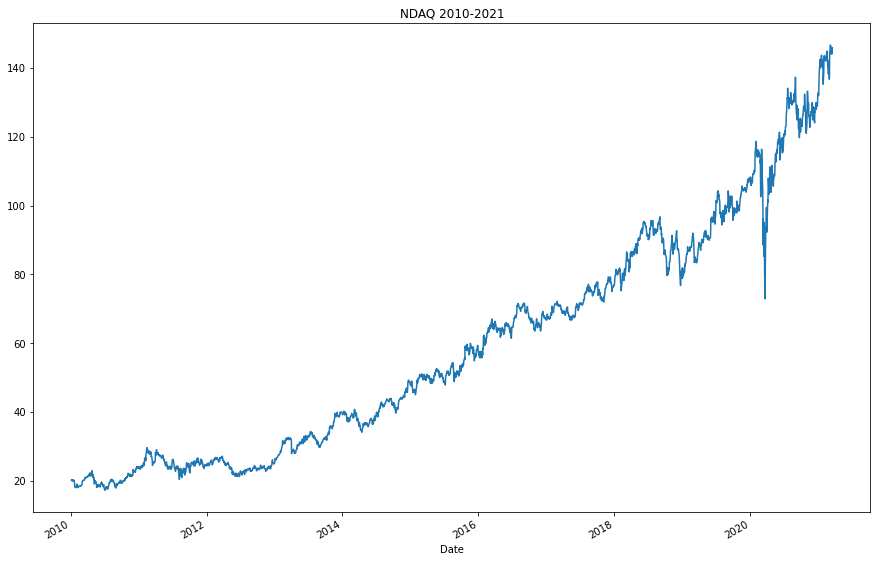

In [34]:
ts.Close.plot(figsize=(15,10), title = "NDAQ 2010-2021")
#PLAIN DATA

In [42]:
print(ts.head)

<bound method NDFrame.head of Date
2010-01-04     17.347511
2010-01-05     17.398933
2010-01-06     17.390356
2010-01-07     17.158953
2010-01-08     17.338934
                 ...    
2021-03-15    145.990005
2021-03-16    145.470001
2021-03-17    144.020004
2021-03-18    144.940002
2021-03-19    145.740005
Name: Adj Close, Length: 2822, dtype: float64>


In [43]:
#Change table to only have closing values

ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo
ts = ts['Adj Close']
print(ts)

Date
2010-01-04     17.347511
2010-01-05     17.398933
2010-01-06     17.390356
2010-01-07     17.158953
2010-01-08     17.338934
                 ...    
2021-03-15    145.990005
2021-03-16    145.470001
2021-03-17    144.020004
2021-03-18    144.940002
2021-03-19    145.740005
Name: Adj Close, Length: 2822, dtype: float64


In [44]:
#Prepare data for normalization
values = ts.values
values = values.reshape((len(values), 1))

In [46]:
#Train the normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 14.827660, Max: 146.152878


In [47]:
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

[0.01918787]
[0.01957944]
[0.01951412]
[0.01775206]
[0.01912256]


In [49]:
#inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
      print(inversed[i])  

[17.34751129]
[17.39893341]
[17.39035606]
[17.15895271]
[17.33893394]
